<a href="https://colab.research.google.com/github/snvssk/data240/blob/development/D240_FeatureSelection_11_17_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from datetime import datetime
from random import randint
from math import sqrt
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, r2_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_curve
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
import time
from xgboost import XGBClassifier
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold,GridSearchCV


In [ ]:
# Original Dataset
data = pd.read_csv("/content/drive/Shareddrives/DATA240 Team 3/weather_location_combine.csv")

# Data Pre-Processing

In [ ]:
data['outcome'] = np.where(data['GHI'] > 350, 'high',(np.where(data['GHI'] < 200, 'low', 'medium')))

In [ ]:
data.head()

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,...,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Location ID,Latitude,Longitude,Elevation,outcome
0,0,2020,1,1,0,0,-2.9,0,0,0,...,0.11,987,0.4,277.0,5.4,903523,41.89,-87.62,179,low
1,1,2020,1,1,0,30,-3.0,0,0,0,...,0.11,987,0.4,275.0,5.2,903523,41.89,-87.62,179,low
2,2,2020,1,1,1,0,-3.1,0,0,0,...,0.11,987,0.4,273.0,5.0,903523,41.89,-87.62,179,low
3,3,2020,1,1,1,30,-3.1,0,0,0,...,0.11,987,0.4,270.0,4.9,903523,41.89,-87.62,179,low
4,4,2020,1,1,2,0,-3.1,0,0,0,...,0.11,987,0.4,267.0,4.8,903523,41.89,-87.62,179,low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788400 entries, 0 to 788399
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          788400 non-null  int64  
 1   Year                788400 non-null  int64  
 2   Month               788400 non-null  int64  
 3   Day                 788400 non-null  int64  
 4   Hour                788400 non-null  int64  
 5   Minute              788400 non-null  int64  
 6   Temperature         788400 non-null  float64
 7   Clearsky DHI        788400 non-null  int64  
 8   Clearsky DNI        788400 non-null  int64  
 9   Clearsky GHI        788400 non-null  int64  
 10  Cloud Type          788400 non-null  int64  
 11  Dew Point           788400 non-null  float64
 12  DHI                 788400 non-null  int64  
 13  DNI                 788400 non-null  int64  
 14  GHI                 788400 non-null  int64  
 15  Relative Humidity   788400 non-nul

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)  
data.drop('Latitude', axis=1, inplace=True)  
data.drop('Longitude', axis=1, inplace=True)  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788400 entries, 0 to 788399
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                788400 non-null  int64  
 1   Month               788400 non-null  int64  
 2   Day                 788400 non-null  int64  
 3   Hour                788400 non-null  int64  
 4   Minute              788400 non-null  int64  
 5   Temperature         788400 non-null  float64
 6   Clearsky DHI        788400 non-null  int64  
 7   Clearsky DNI        788400 non-null  int64  
 8   Clearsky GHI        788400 non-null  int64  
 9   Cloud Type          788400 non-null  int64  
 10  Dew Point           788400 non-null  float64
 11  DHI                 788400 non-null  int64  
 12  DNI                 788400 non-null  int64  
 13  GHI                 788400 non-null  int64  
 14  Relative Humidity   788400 non-null  float64
 15  Solar Zenith Angle  788400 non-nul

# Data Preperation

In [ ]:
# To check number rows in each category
row_count = pd.DataFrame()
row_count['Before'] = data['outcome'].value_counts()
row_count

,Before
low,550439
high,170643
medium,67318


In [ ]:
data.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Location ID,Elevation,outcome
0,2020,1,1,0,0,-2.9,0,0,0,0,...,88.28,161.09,0.11,987,0.4,277.0,5.4,903523,179,low
1,2020,1,1,0,30,-3.0,0,0,0,4,...,88.94,159.68,0.11,987,0.4,275.0,5.2,903523,179,low
2,2020,1,1,1,0,-3.1,0,0,0,4,...,88.51,156.62,0.11,987,0.4,273.0,5.0,903523,179,low
3,2020,1,1,1,30,-3.1,0,0,0,4,...,88.51,152.47,0.11,987,0.4,270.0,4.9,903523,179,low
4,2020,1,1,2,0,-3.1,0,0,0,4,...,87.92,147.67,0.11,987,0.4,267.0,4.8,903523,179,low


In [ ]:
data = data.loc[(data['Hour'].isin([7, 10, 13, 16, 19])) & (data['Minute'] == 0)]

In [ ]:
data.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Location ID,Elevation,outcome
14,2020,1,1,7,0,-3.5,0,0,0,4,...,92.20,93.80,0.11,987,0.4,236.0,5.0,903523,179,low
20,2020,1,1,10,0,0.0,59,875,358,2,...,79.80,70.01,0.11,986,0.3,205.0,6.7,903523,179,medium
26,2020,1,1,13,0,4.3,70,878,418,0,...,67.05,66.63,0.11,982,0.5,204.0,7.4,903523,179,high
32,2020,1,1,16,0,3.6,26,340,50,0,...,80.16,86.01,0.11,980,0.7,191.0,7.3,903523,179,low
38,2020,1,1,19,0,3.2,0,0,0,4,...,85.80,117.07,0.11,980,1.1,192.0,8.9,903523,179,low


In [ ]:
# To check number rows in each category
row_count['After'] = data['outcome'].value_counts()

In [ ]:
row_count['Before_Percentage'] = row_count['Before']/np.sum(row_count['Before']) * 100
row_count['After_Percentage'] = row_count['After']/np.sum(row_count['After']) * 100
row_count

,Before,After,Before_Percentage,After_Percentage
low,550439,42237,69.817225,51.430137
high,170643,28638,21.644216,34.871233
medium,67318,11250,8.538559,13.698630


Based on above we can see the ration is not only maintained but got better for all the categories

# Data Transformation

In [ ]:
X = data.drop(['GHI','outcome'], axis =1)
X

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DNI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Location ID,Elevation
14,2020,1,1,7,0,-3.5,0,0,0,4,...,0,92.20,93.80,0.11,987,0.400,236.0,5.0,903523,179
20,2020,1,1,10,0,0.0,59,875,358,2,...,414,79.80,70.01,0.11,986,0.300,205.0,6.7,903523,179
26,2020,1,1,13,0,4.3,70,878,418,0,...,878,67.05,66.63,0.11,982,0.500,204.0,7.4,903523,179
32,2020,1,1,16,0,3.6,26,340,50,0,...,203,80.16,86.01,0.11,980,0.700,191.0,7.3,903523,179
38,2020,1,1,19,0,3.2,0,0,0,4,...,0,85.80,117.07,0.11,980,1.100,192.0,8.9,903523,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788366,2016,12,31,7,0,-1.0,0,0,0,4,...,0,88.51,99.30,0.07,1000,0.722,158.8,1.0,241108,49
788372,2016,12,31,10,0,1.0,54,642,202,4,...,642,100.00,76.67,0.07,1000,0.775,188.7,0.9,241108,49
788378,2016,12,31,13,0,2.0,65,729,297,4,...,729,99.53,71.41,0.07,1000,1.055,186.5,1.2,241108,49
788384,2016,12,31,16,0,0.0,17,379,36,1,...,379,73.67,87.15,0.07,1020,0.440,101.8,0.9,241108,49


In [ ]:
y = data['outcome']
y

14           low
20        medium
26          high
32           low
38           low
           ...  
788366       low
788372    medium
788378    medium
788384       low
788390       low
Name: outcome, Length: 82125, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [ ]:
print(f' Shape of X_train : {X_train.shape}')
print(f' Shape of y_train : {y_train.shape}')
print(f' Shape of X_test : {X_test.shape}')
print(f' Shape of y_test : {y_test.shape}')

 Shape of X_train : (57487, 22)
 Shape of y_train : (57487,)
 Shape of X_test : (24638, 22)
 Shape of y_test : (24638,)


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
forest = RandomForestClassifier(criterion='entropy',max_depth=3, n_estimators=500, random_state=0)

In [ ]:
forest.fit(X_train, y_train)
importances = forest.feature_importances_

In [ ]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_] , axis=0)
df = pd.DataFrame({'feature' : X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')

In [ ]:
print(df)

               feature    importance       std
4               Minute  0.000000e+00  0.000000
2                  Day  4.657559e-07  0.000009
0                 Year  2.814398e-05  0.000272
20         Location ID  1.161672e-04  0.000909
19          Wind Speed  1.303213e-04  0.001050
16            Pressure  3.291101e-04  0.001543
18      Wind Direction  3.321875e-04  0.001675
15      Surface Albedo  9.247033e-04  0.004668
17  Precipitable Water  9.392481e-04  0.003658
21           Elevation  1.031194e-03  0.003519
10           Dew Point  1.089202e-03  0.004818
1                Month  1.740995e-03  0.008743
5          Temperature  1.681284e-02  0.044919
3                 Hour  3.190339e-02  0.092573
13   Relative Humidity  3.231129e-02  0.071641
9           Cloud Type  3.852594e-02  0.064477
6         Clearsky DHI  8.615177e-02  0.178328
7         Clearsky DNI  1.196867e-01  0.210756
12                 DNI  1.412050e-01  0.178474
11                 DHI  1.443909e-01  0.237708
14  Solar Zen

Text(0.5, 1.0, 'Feature Importance')

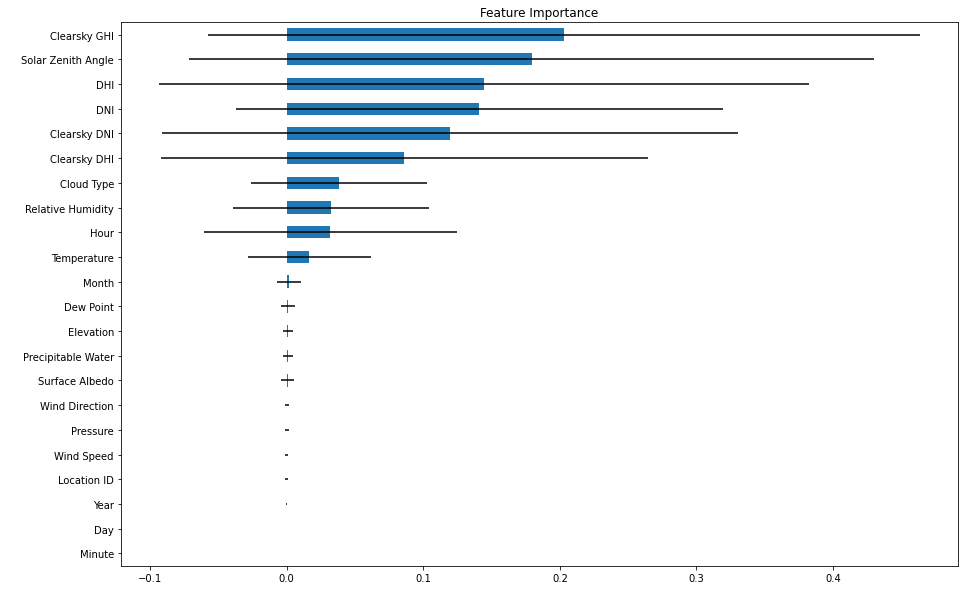

In [ ]:
ax = df.plot(kind='barh', xerr='std', x='feature', legend=False,figsize=(15, 10))
ax.set_ylabel(' ')
ax.set_title('Feature Importance')

In [ ]:
df.sort_values(by=['importance'],ascending = False,ignore_index = True).head(13)

,feature,importance,std
0,Clearsky GHI,0.202951,0.260562
1,Solar Zenith Angle,0.179400,0.250660
2,DHI,0.144391,0.237708
3,DNI,0.141205,0.178474
4,Clearsky DNI,0.119687,0.210756
5,Clearsky DHI,0.086152,0.178328
6,Cloud Type,0.038526,0.064477
7,Relative Humidity,0.032311,0.071641
8,Hour,0.031903,0.092573
9,Temperature,0.016813,0.044919


# Model Training with all the feature

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['outcome']= label_encoder.fit_transform(data['outcome']) 
y = data['outcome']
y

14        1
20        2
26        0
32        1
38        1
         ..
788366    1
788372    2
788378    2
788384    1
788390    1
Name: outcome, Length: 82125, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X.fit_transform(X)
X

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DNI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Location ID,Elevation
14,2020,1,1,7,0,-3.5,0,0,0,4,...,0,92.20,93.80,0.11,987,0.400,236.0,5.0,903523,179
20,2020,1,1,10,0,0.0,59,875,358,2,...,414,79.80,70.01,0.11,986,0.300,205.0,6.7,903523,179
26,2020,1,1,13,0,4.3,70,878,418,0,...,878,67.05,66.63,0.11,982,0.500,204.0,7.4,903523,179
32,2020,1,1,16,0,3.6,26,340,50,0,...,203,80.16,86.01,0.11,980,0.700,191.0,7.3,903523,179
38,2020,1,1,19,0,3.2,0,0,0,4,...,0,85.80,117.07,0.11,980,1.100,192.0,8.9,903523,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788366,2016,12,31,7,0,-1.0,0,0,0,4,...,0,88.51,99.30,0.07,1000,0.722,158.8,1.0,241108,49
788372,2016,12,31,10,0,1.0,54,642,202,4,...,642,100.00,76.67,0.07,1000,0.775,188.7,0.9,241108,49
788378,2016,12,31,13,0,2.0,65,729,297,4,...,729,99.53,71.41,0.07,1000,1.055,186.5,1.2,241108,49
788384,2016,12,31,16,0,0.0,17,379,36,1,...,379,73.67,87.15,0.07,1020,0.440,101.8,0.9,241108,49


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0,stratify=y)

In [ ]:
print(f' Shape of X_train : {X_train.shape}')
print(f' Shape of y_train : {y_train.shape}')
print(f' Shape of X_test : {X_train.shape}')
print(f' Shape of y_test : {y_test.shape}')

 Shape of X_train : (57487, 22)
 Shape of y_train : (57487,)
 Shape of X_test : (57487, 22)
 Shape of y_test : (24638,)


In [ ]:
y = data['outcome']
y

In [ ]:
# y = data2['outcome']

# X = data2.drop(['outcome'], axis =1)

# class_le = LabelEncoder()
# class_le.fit(valid_type)

# y = class_le.transform(y)

# #scaler = MinMaxScaler()
# scaler = StandardScaler()
X = scaler.fit_transform(X)

## AdaBoost

In [ ]:
from sklearn.svm import SVC

svc= SVC(probability=True, kernel='linear')

model_ada = AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()

# define the grid of values to search

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']
scoring = ['accuracy','f1_macro']

# define the evaluation procedure
grid_search_ada = GridSearchCV(estimator = model_ada , param_grid = grid, n_jobs = -1, refit='accuracy', scoring = scoring)

grid_result = grid_search_ada.fit(X_train, y_train)


KeyboardInterrupt: ignored

In [ ]:
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## SVR

In [ ]:
classifier_r = SVC(kernel='rbf', decision_function_shape = 'ovr', class_weight = 'balanced', C=5, random_state=0)

classifier_r.fit(X_train, y_train)

In [ ]:
y_pred_r = classifier_r.predict(X_test)
print(y_pred_r)

In [ ]:
cm_r = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm_r)

In [ ]:
print(classification_report(y_test_r, y_pred_r))

# Model Training with selected Features

## SVR

In [ ]:
classifier = SVC(kernel='rbf', decision_function_shape = 'ovr', class_weight = 'balanced', C=5, random_state=0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

In [ ]:
print(classification_report(y_test, y_pred))

## XGBoost

## AdaBoost